# $\chi^2$ distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gamma

### (1) Define $\chi^2$ experiment

Use standard normal distribution ($\mu=0$, $\sigma=1$) for simplicity


In [2]:
# Result of single measurement

def mychi(npt):
    mes = np.random.normal(size=npt)
    return np.sum(mes*mes)          

In [3]:
# One can also generate multiple measurements in one call (array of chi2 returned)

def myNchi(npt,ngen):
    mes = np.random.normal(size=(ngen,npt))
    return np.sum(mes*mes, axis=1)

### (2) Run multiple experiments

In [4]:
%%time
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 2

# Table to collect results

ch2vec = np.empty(Ntry)

# Standard approach: generate single experiments one by one 

for i in  range(Ntry):
    exp_data = mychi(Nmes)
    ch2vec[i] = exp_data

CPU times: user 891 ms, sys: 1.34 ms, total: 892 ms
Wall time: 889 ms


In [5]:
%%time
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 2

# Optimized approach: generate all measurements in one call

ch2vec = myNchi(Nmes,Ntry)

CPU times: user 7.89 ms, sys: 1.86 ms, total: 9.75 ms
Wall time: 9.16 ms


### (3) Plot results

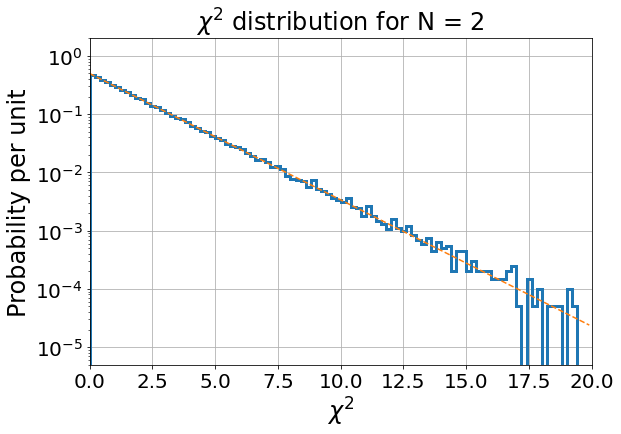

In [6]:
Xmax=5.0*((12.+Nmes+5*np.sqrt(2*Nmes))//5)

Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(ch2vec,bins=Nbin, range=[0.,Xmax], density=True, log=True, histtype='step',linewidth=3)

plt.title("$\chi^2$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$\chi^2$',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Xmax])
plt.ylim([0.5/Ntry,2.])
plt.grid(which='major', axis='both')

# Expected Gamma distribution

def myGamma(x, Ndf):
    return gamma.pdf(x,Ndf/2.,0,2.)

xvec = np.arange(0.,Xmax,0.1)
fvec = myGamma(xvec,Nmes)

plt.plot(xvec,fvec,'--')

fname = '08_chi2_'+str(Nmes)+'.png'
plt.savefig(fname)

plt.show()